All Rights Reserved @cimple-chandu

In [ ]:
import random
import pandas as pd 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

DATASET_DIR = "C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice_Leaf_AUG/Rice_Leaf_AUG"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

datagen = ImageDataGenerator(rescale=1./255)
all_data_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

filenames = all_data_gen.filepaths
classes = all_data_gen.classes
class_labels = list(all_data_gen.class_indices.keys())

data = pd.DataFrame({
    'filename': filenames,
    'class': [class_labels[k] for k in classes]
})

train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['class'], random_state=SEED)
val_data, test_data = train_test_split(test_data, test_size=0.5, stratify=test_data['class'], random_state=SEED)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 13840 images belonging to 10 classes.
Found 11072 validated image filenames belonging to 10 classes.
Found 1384 validated image filenames belonging to 10 classes.
Found 1384 validated image filenames belonging to 10 classes.


Error loading image from G:\My Drive\Rice_Leaf_AUG\Neck Blast\IMG20201108163458_00.jpg. Skipping this image.


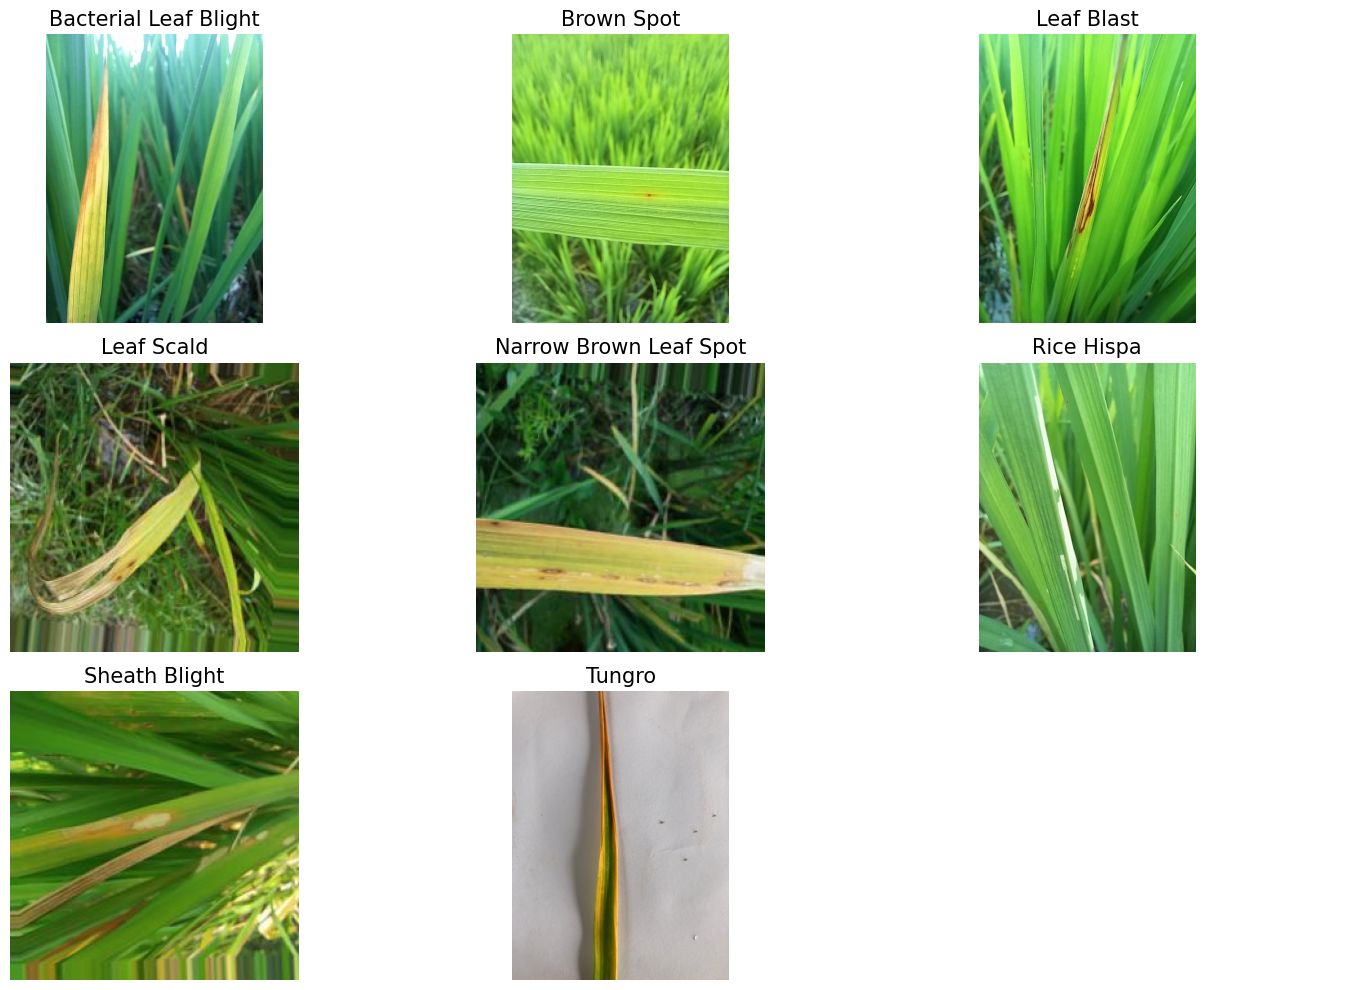

In [16]:
import cv2
import matplotlib.pyplot as plt
import os

# Define the directories
BacterialLeafBlight = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Bacterial Leaf Blight")
BrownSpot = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Brown Spot")
LeafBlast = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Leaf Blast")
Leafscald = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Leaf scald")
NarrowBrownLeafSpot = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Narrow Brown Leaf Spot")
RiceHispa = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Rice Hispa")
ShealthBlight = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Sheath Blight")
Tungro = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\tungro")
NeckBlast = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Neck_Blast")

# List of directories and corresponding titles
directories = [
    (BacterialLeafBlight, 'Bacterial Leaf Blight'),
    (BrownSpot, 'Brown Spot'),
    (LeafBlast, 'Leaf Blast'),
    (Leafscald, 'Leaf Scald'),
    (NarrowBrownLeafSpot, 'Narrow Brown Leaf Spot'),
    (RiceHispa, 'Rice Hispa'),
    (ShealthBlight, 'Sheath Blight'),
    (Tungro, 'Tungro'),
    (NeckBlast, 'Neck Blast')
]

# Create the figure with a specific canvas size
plt.figure(figsize=(15, 10), facecolor='white')  # Set canvas size

# Loop through the directories and plot one image from each
for i, (img_list, title) in enumerate(directories):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns for 9 images
    
    # Check if the directory is not empty and select the first image
    if img_list:
        img_path = os.path.join(r"G:\My Drive\Rice_Leaf_AUG", title, img_list[0])  # Use the first image in each class
        
        # Read the image
        img = cv2.imread(img_path)
        
        # Check if the image was loaded correctly
        if img is not None:
            # Convert the image from BGR to RGB because OpenCV reads in BGR format
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Display the image
            plt.imshow(img_rgb)
            plt.title(title, fontsize=15)  # Title as class name
            plt.axis('off')  # Hide the axis for a cleaner display
        else:
            print(f"Error loading image from {img_path}. Skipping this image.")
            plt.axis('off')  # If there's an error, hide the axis and move to the next plot
    else:
        print(f"No images found in directory: {title}. Skipping this directory.")
        plt.axis('off')  # If no images, skip the subplot and hide the axis

# Adjust layout to ensure the images do not overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the ResNet152V2 model with pre-trained ImageNet weights
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model to prevent them from being trained
base_model.trainable = False

# Add custom top layers to the ResNet model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')  # Change the number of classes (10 here as an example)
])

# Compile the model with an Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ (None, 7, 7, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,440,074 (230.56 MB)

 Trainable params: 2,108,426 (8.04 MB)

 Non-trainable params: 58,331,648 (222.52 MB)

c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


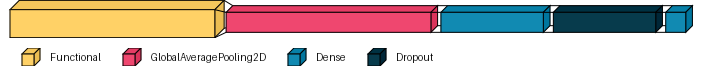

<Figure size 1500x1000 with 0 Axes>

In [17]:
plt.figure(figsize=(15,10),facecolor="white")
import visualkeras
visualkeras.layered_view(model,legend=True)

In [ ]:
#early stopping and callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_resnet152v2_model.keras', monitor='val_accuracy', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50


c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


346/346 ━━━━━━━━━━━━━━━━━━━━ 1356s 4s/step - accuracy: 0.4535 - loss: 1.6337 - val_accuracy: 0.7579 - val_loss: 0.7351
Epoch 2/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 2133s 6s/step - accuracy: 0.7481 - loss: 0.7605 - val_accuracy: 0.8172 - val_loss: 0.5722
Epoch 3/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 1966s 6s/step - accuracy: 0.8190 - loss: 0.5575 - val_accuracy: 0.8512 - val_loss: 0.4950
Epoch 4/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 1865s 5s/step - accuracy: 0.8633 - loss: 0.4423 - val_accuracy: 0.8656 - val_loss: 0.4324
Epoch 5/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 1191s 3s/step - accuracy: 0.8821 - loss: 0.3740 - val_accuracy: 0.8808 - val_loss: 0.3866
Epoch 6/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 1021s 3s/step - accuracy: 0.9086 - loss: 0.3080 - val_accuracy: 0.8902 - val_loss: 0.3496
Epoch 7/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 1205s 3s/step - accuracy: 0.9247 - loss: 0.2631 - val_accuracy: 0.9010 - val_loss: 0.3348
Epoch 8/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 1559s 4s/step - accuracy: 0.9396 - loss: 0.2221 - val_accurac

In [7]:
model.save(r'G:\My Drive\resnet152v2_final.h5')

In [8]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

   1/1384 ━━━━━━━━━━━━━━━━━━━━ 4:12 183ms/step - accuracy: 1.0000 - loss: 0.0640

c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1384/1384 ━━━━━━━━━━━━━━━━━━━━ 169s 122ms/step - accuracy: 0.9511 - loss: 0.1493
Test accuracy: 0.95


In [ ]:
#fine-tuning of model
model.trainable=True

# Re-compile the model after unfreezing layers
model.compile(optimizer=Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ (None, 7, 7, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,440,074 (230.56 MB)

 Trainable params: 2,108,426 (8.04 MB)

 Non-trainable params: 58,331,648 (222.52 MB)

In [ ]:
history_fine_tune = model.fit(
    train_generator,
    epochs=10, 
    validation_data=val_generator,
)

Epoch 1/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 4358s 13s/step - accuracy: 0.9976 - loss: 0.0278 - val_accuracy: 0.9444 - val_loss: 0.1697
Epoch 2/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 981s 3s/step - accuracy: 0.9990 - loss: 0.0228 - val_accuracy: 0.9429 - val_loss: 0.1705
Epoch 3/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1045s 3s/step - accuracy: 0.9983 - loss: 0.0221 - val_accuracy: 0.9422 - val_loss: 0.1699
Epoch 4/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1037s 3s/step - accuracy: 0.9986 - loss: 0.0204 - val_accuracy: 0.9436 - val_loss: 0.1678
Epoch 5/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1050s 3s/step - accuracy: 0.9987 - loss: 0.0203 - val_accuracy: 0.9422 - val_loss: 0.1682
Epoch 6/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1043s 3s/step - accuracy: 0.9990 - loss: 0.0207 - val_accuracy: 0.9422 - val_loss: 0.1692
Epoch 7/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1039s 3s/step - accuracy: 0.9995 - loss: 0.0190 - val_accuracy: 0.9458 - val_loss: 0.1676
Epoch 8/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1036s 3s/step - accuracy: 0.9988 - loss: 0.0186 - 

In [11]:
model.save(r'G:\My Drive\resnet152v2_final_tuned.h5')

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 168s 121ms/step - accuracy: 0.9502 - loss: 0.1424
Test accuracy: 0.95


In [4]:
from tensorflow.keras.models import load_model
model=load_model(r'G:\My Drive\final_models\resnet152v2_94.h5')

Total steps (batches to process): 1384
   2/1384 ━━━━━━━━━━━━━━━━━━━━ 2:13 97ms/step - accuracy: 1.0000 - loss: 0.0707 

c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1384/1384 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - accuracy: 0.9502 - loss: 0.1424
Test Loss: 0.15770982205867767
Test Accuracy: 0.948699414730072
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1

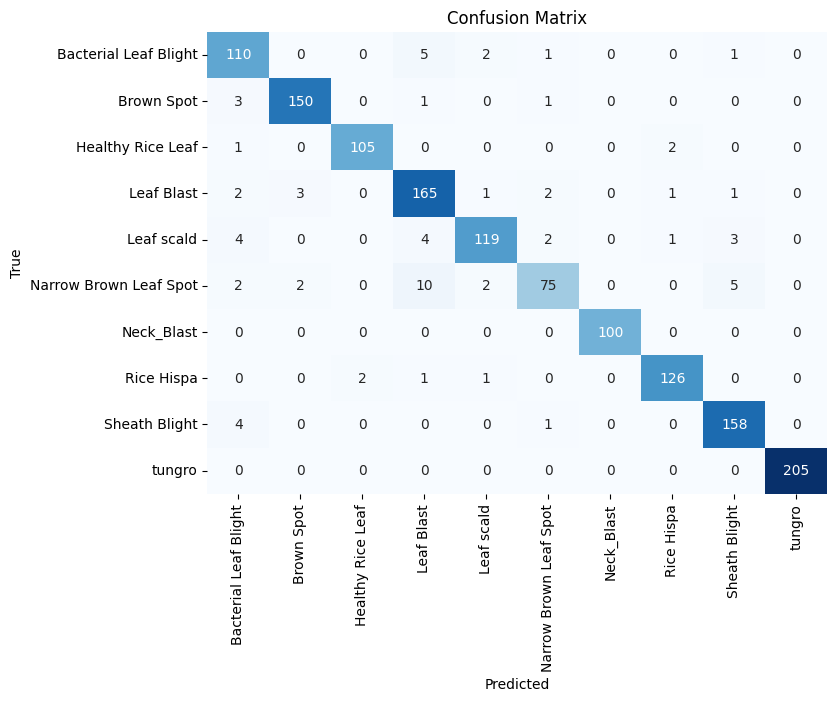

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have these from your trained model
# test_generator: A generator that yields batches of data (X, y)
# model: Your trained Keras/TensorFlow model

# Calculate number of steps based on the number of test images and batch size
steps = np.ceil(test_generator.samples / test_generator.batch_size).astype(int)
print(f"Total steps (batches to process): {steps}")

# Step 1: Evaluate the model on the test generator (optional, if you need to see loss/accuracy)
score = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

# Step 2: Predict the labels on the entire test dataset from the test generator
y_true = []
y_pred = []

# Loop over the test generator and collect the results
for i, (X_batch, y_batch) in enumerate(test_generator):
    y_batch_pred = model.predict(X_batch)  # Get predictions for the batch
    
    y_true.extend(np.argmax(y_batch, axis=1))  # True labels
    y_pred.extend(np.argmax(y_batch_pred, axis=1))  # Predicted labels
    
    # Stop once we have reached the defined number of steps
    if i + 1 >= steps:
        break  # Exit after processing the desired number of batches

# Convert lists to arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 3: Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 4: Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  classification_report, roc_curve, auc
from sklearn.metrics import  f1_score, precision_score, recall_score

In [8]:
precision = precision_score(y_true, y_pred, average='macro')  # Change to 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.9486
Recall: 0.9422
F1-Score: 0.9446


In [10]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       119
           1       0.97      0.97      0.97       155
           2       0.98      0.97      0.98       108
           3       0.89      0.94      0.91       175
           4       0.95      0.89      0.92       133
           5       0.91      0.78      0.84        96
           6       1.00      1.00      1.00       100
           7       0.97      0.97      0.97       130
           8       0.94      0.97      0.95       163
           9       1.00      1.00      1.00       205

    accuracy                           0.95      1384
   macro avg       0.95      0.94      0.94      1384
weighted avg       0.95      0.95      0.95      1384



In [12]:
y_prob = model.predict(test_generator, verbose=1)

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 145s 103ms/step


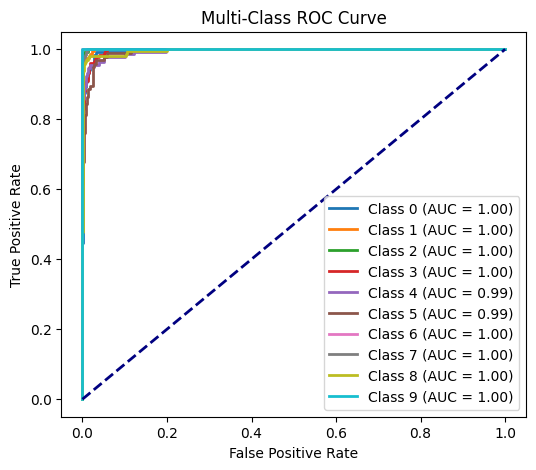

In [13]:
if y_prob.shape[1] > 2:  # Multi-class classification
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(y_prob.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_prob[:, i])  # Binarize for each class
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(6, 5))
    for i in range(len(roc_auc)):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


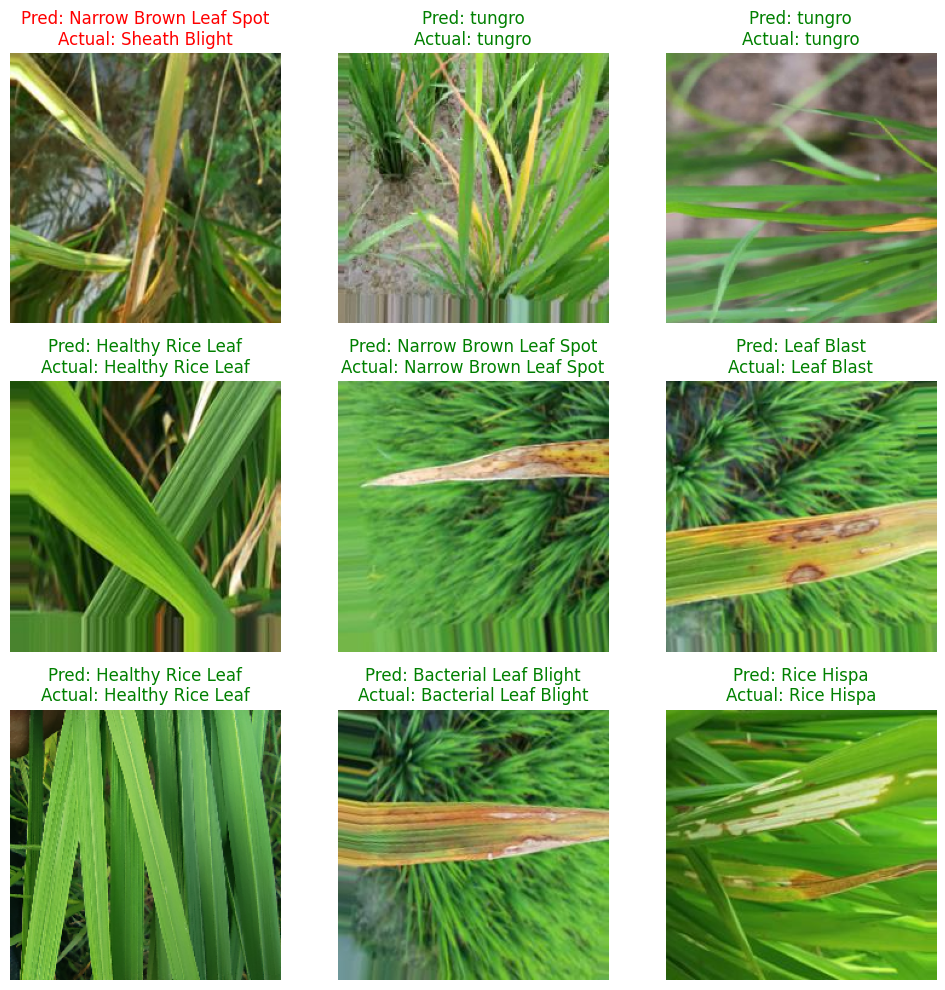

In [14]:
filenames = test_generator.filenames
classes = test_generator.classes
labels = list(test_generator.class_indices.keys())

random_indices = random.sample(range(len(filenames)), 9)
images = []
actual_labels = []
predicted_labels = []

for idx in random_indices:
    img, label = test_generator[idx]
    images.append(img[0])
    actual_labels.append(classes[idx])
    pred = model.predict(img)
    predicted_labels.append(np.argmax(pred))

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    actual_class = labels[actual_labels[i]]
    predicted_class = labels[predicted_labels[i]]
    color = 'green' if actual_class == predicted_class else 'red'
    plt.title(f"Pred: {predicted_class}\nActual: {actual_class}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model(r'G:\My Drive\trained_models\resnet152v2_94.h5')

def predict_rice_disease(img):
    # Preprocess the image to the correct format for the model
    img = img.resize((224, 224))  # Assuming the model expects 224x224 images
    img_array = np.array(img) / 255.0  # Normalize if needed
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=-1)[0]  # Get the index of the predicted class
    
    # Map the predicted class index to the disease name (modify according to your class names)
    class_names = ['Bacterial Leaf Blight', 'Brown Spot', 'Healthy Rice Leaf', 'Leaf Blast', 'Leaf scald', 'Narrow Brown Leaf Spot', 'Neck_Blast', 'Rice Hispa', 'Sheath Blight', 'tungro'] # Example class names
    return class_names[class_idx]
# Create Gradio interface
interface = gr.Interface(
    fn=predict_rice_disease,  # The function to call for predictions
    inputs=gr.Image(type="pil"),  # Input is an image in PIL format
    outputs=gr.Textbox(),  # Output is a text label showing the disease name
    title="Rice Disease Detection",  # Title of the interface
    description="Upload an image of a rice leaf to detect its disease.",  # Description of the app
)

# Launch the interface
interface.launch()


c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
